This notebook provides a visualisation of the raw data for the monoisotope, and shows the curve that was fitted to find the RT apex.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
MAPPING_FILE_NAME = "/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/recalibrated-percolator-output/percolator-idx-mapping.csv"

# determine the mapping between the percolator index and the run file name
def get_percolator_run_mapping(mapping_file_name):
    df = pd.read_csv(mapping_file_name)
    mapping_l = [tuple(r) for r in df.to_numpy()]
    return mapping_l

def file_idx_for_run(run_name):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[1] == run_name:
            result = m[0]
            break
    return result

def run_name_for_file_idx(file_idx):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[0] == file_idx:
            result = m[1]
            break
    return result

In [39]:
sequence_metrics_name = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/target-decoy-models/experiment-metrics-for-library-sequences-test.pkl'

In [50]:
df = pd.read_pickle(sequence_metrics_name)

In [51]:
df.columns

Index(['sequence', 'charge', 'theoretical_mz', 'experiment_scan_mean',
       'experiment_scan_std_dev', 'experiment_scan_peak_width',
       'experiment_rt_mean', 'experiment_rt_std_dev',
       'experiment_rt_peak_width', 'experiment_intensity_mean',
       'experiment_intensity_std_dev', 'number_of_runs_identified', 'q_value',
       'file_idx', 'target_coords', 'decoy_coords', 'target_metrics',
       'attributes', 'decoy_metrics'],
      dtype='object')

In [52]:
run_name = '190719_Hela_Ecoli_1to1_01'
file_idx = file_idx_for_run(run_name)

selected_sequence = 'VGMGTCQGELCACR'
selected_sequence_charge = 2

In [ ]:
df = df[(df.sequence == selected_sequence) & (df.charge == selected_sequence_charge) & (df.file_idx == file_idx)]

In [53]:
mono_raw_points_df = pd.DataFrame(df.iloc[0].attributes['mono_raw_points_l'], columns=['retention_time_secs','intensity'])
mono_rt_fitted_curve_df = pd.DataFrame(df.iloc[0].attributes['mono_rt_fitted_curve_l'], columns=['retention_time_secs','intensity'])
mono_rt_isolated_peak_df = pd.DataFrame(df.iloc[0].attributes['mono_rt_isolated_peak_l'], columns=['retention_time_secs','intensity'])
mono_rt_filtered_df = pd.DataFrame(df.iloc[0].attributes['mono_filtered_points_l'], columns=['intensity'])

In [54]:
mono_rt_apex_derived = df.iloc[0].attributes['rt_apex']
mono_rt_apex_estimated = df.iloc[0].target_coords['rt_apex']

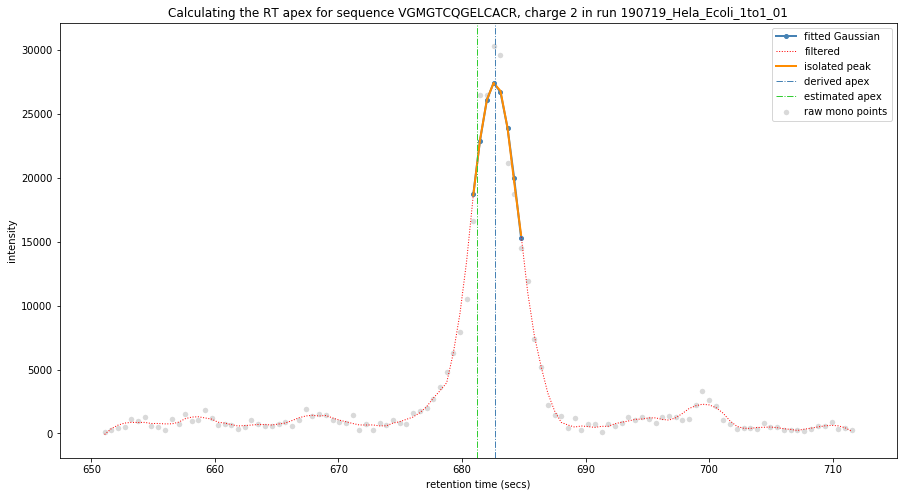

In [63]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

title = 'Calculating the RT apex for sequence {}, charge {} in run {}'.format(selected_sequence, selected_sequence_charge, run_name)
plt.title(title)

ax.scatter(mono_raw_points_df.retention_time_secs, mono_raw_points_df.intensity, marker='o', color='silver', lw=0, s=30, alpha=0.6, label='raw mono points')

ax.plot(mono_rt_fitted_curve_df.retention_time_secs, mono_rt_fitted_curve_df.intensity, marker='o', color='steelblue', linestyle='-', linewidth=2, ms=4, label='fitted Gaussian')
ax.plot(mono_raw_points_df.retention_time_secs, mono_rt_filtered_df.intensity, marker='', color='red', linestyle=':', linewidth=1, ms=5, label='filtered')
ax.plot(mono_rt_isolated_peak_df.retention_time_secs, mono_rt_isolated_peak_df.intensity, marker='', color='darkorange', linestyle='-', linewidth=2, ms=5, label='isolated peak')

ax.axvline(mono_rt_apex_derived, color='steelblue', lw=1.0, ls='-.', label='derived apex')
ax.axvline(mono_rt_apex_estimated, color='limegreen', lw=1.0, ls='-.', label='estimated apex')

plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')

# plt.xlim((4,17))
# plt.ylim((4,17))

plt.show()